# __Stroke Prediction__


## __Contents:__
> 1. Overview
> 2. Installation
> 3. Read the dataset
> 4. Explore Information
> 5. Cleaning the dataset
>> 1. Handling whitespaces
>> 2. Handling the Missing Values
>> 3. Handling unnecessary Values
>> 4. Handling the Outliers
> 6. Explore Data Analysis
>> 1. Questions & Answers



## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/code?datasetId=1120859&sortBy=voteCount)


# <hr>

## __Installation:__

In [75]:
# !pip install imblearn
# !pip install pywaffle

In [76]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pywaffle import Waffle


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import (precision_recall_curve,plot_precision_recall_curve)
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report,confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek 

from sklearn.ensemble import StackingClassifier


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# <hr>

## __Read the Dataset:__

In [77]:
# Read Dataset
df = pd.read_csv('data/stroke-data.csv')
df_eda = df.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [78]:
df_eda.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# <hr>

## __Cleaning the Dataset:__

### Explore the data and the correlations

In [79]:
df_eda.shape

(5110, 12)

### Handling whitespaces:

In [80]:
# strip whitespaces in columns
df.columns.str.strip()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [81]:
# strip whitespaces in values of multiple columns
cols = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
df[cols] = df[cols].apply(lambda x: x.str.strip())

### Handling the Missing Values:

In [82]:
# Check for null values
df_eda.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [83]:
df_eda.bmi.mean()

28.893236911794673

In [84]:
df_eda.bmi.median()

28.1

In [85]:
# fill null values in bmi column
df_eda.bmi= df_eda.bmi.fillna(df_eda.bmi.mean())

In [86]:
df_eda.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [87]:
df_eda.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

### Unnecessary Values:

In [88]:
# Round up the age 
df_eda.age = df_eda.age.round().astype('int')

In [89]:
# Delete 'id' column 
df_eda = df_eda.drop('id', axis=1)

### Handling the Outliers:

In [90]:
fig = px.box(df_eda, x="work_type", y="age" , color='hypertension') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [91]:
fig = px.box(df_eda, x="smoking_status", y="age" , color='work_type') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [92]:
fig = px.box(df_eda, x="gender", y="age" , color='stroke') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

> We can see here a weird category in the gender so we will delete this category


In [93]:
# # Drop 'Other' Because only one patient has 'other'
df_eda.drop(df_eda.loc[df_eda['gender']=='Other'].index, inplace=True)

In [94]:
# # now we will handle the outlier
# df_eda= df_eda.loc[df_eda['age']== 1 and df_eda['stroke']== 1].replace(df_eda['stroke']== 0)
# df_eda

In [95]:
df_eda

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [96]:
fig = px.box(df_eda, x="heart_disease", y="age" , color='stroke') 
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### Adding the categories:

In [97]:
df_eda['bmi_cat'] = pd.cut(df_eda['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df_eda['glucose_cat'] = pd.cut(df_eda['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df_eda['age_cat'] = pd.cut(df_eda['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

# <hr>

## __Explore Data Analysis:__

### Questions & Answers:

#### 1. Does age has impact on strokes?

In [98]:
# Code
age_group = df_eda.groupby(['age' ,'stroke'] , as_index=False)[['stroke']].count()
age_group

,age,stroke
0,0,20
1,1,64
2,1,1
3,2,90
4,3,46
...,...,...
122,80,17
123,81,46
124,81,14
125,82,47


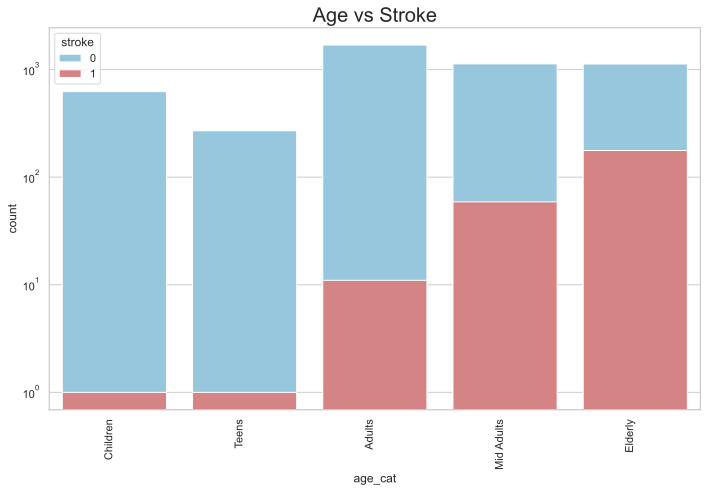

In [99]:
# Visual
plt.figure(figsize = (10,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= "age_cat" , hue= "stroke" , dodge=False, data= df_eda , palette=['#8BCBE8','#E37678'] );
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right");
plt.title('Age vs Stroke', size=20);
plt.yscale('log');
plt.tight_layout()


<ipython-input-100-9c6d9ed7dcea>:7: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-100-9c6d9ed7dcea>:9: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



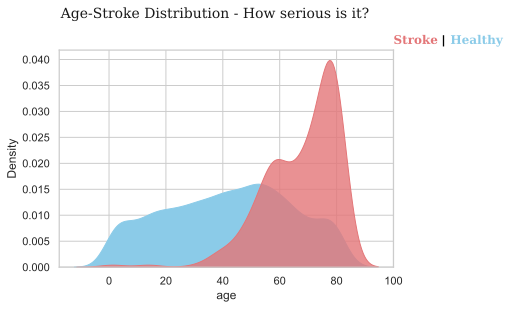

In [100]:

sns.kdeplot(data = df[df['stroke'] == 0], x = 'age', shade = True,  alpha = 1, legend=True, color = '#8BCBE8' );
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age', shade = True,  alpha = 0.8, legend=True, color = '#E37678');
# title
plt.text(-17,0.048,'Age-Stroke Distribution - How serious is it?', {'font':'Serif','color': 'black', 'size':14}, alpha= 0.9);

# legend
plt.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'});
plt.text(117,0.043, '|', {'color':'black' , 'size':'12', 'weight': 'bold'});
plt.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'});

#### 2. Does body mass index and glucose levels in a person, propel a stroke?

In [101]:
# Code
bmi_group = df_eda.groupby(['glucose_cat' , 'stroke'] )[['stroke']].count()
bmi_group.head(60) 

stroke
glucose_cat stroke        
Low         0         2316
            1           89
Normal      0         1965
            1           71
High        0          478
            1           71
Very High   0          101
            1           18

##### Glucose Figure

<ipython-input-102-c0ba23cdbc13>:46: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-102-c0ba23cdbc13>:49: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-102-c0ba23cdbc13>:50: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-102-c0ba23cdbc13>:52: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-102-c0ba23cdbc13>:56: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-102-c0ba23cdbc13>:57: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-102-c0

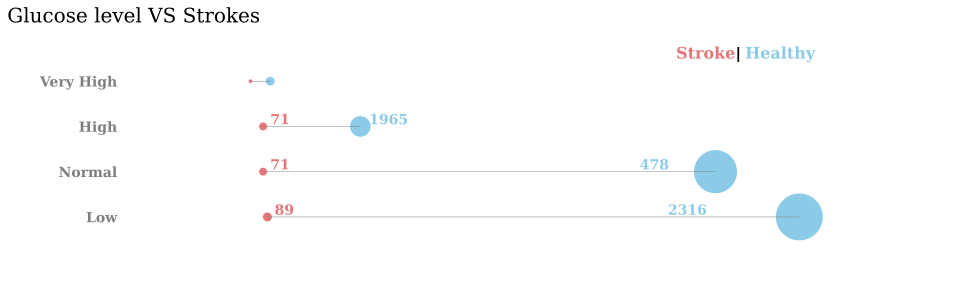

In [102]:
# Visual
#  Visual for glucose and storke 
fig = plt.figure(figsize = (15,5), dpi = 60)
sns.set_theme(style="white")
gs = fig.add_gridspec(15,5)
gs.update(wspace = 1, hspace = 0.05)
ax1 = fig.add_subplot() #dumbbell plot

# axes list
axes = [ ax1]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#ffff')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#ffff')

# set x axis invisiable        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_glu = df_eda[df_eda['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df_eda[df_eda['stroke'] == 0].glucose_cat.value_counts()

# Take the result from the value count in list  and match it with a title for each result 
ax1.hlines( y =['Low', 'Normal', 'High', 'Very High'], xmin = [2316,1966,478,101], 
          xmax = [89,71,71,18], color = 'grey',**{'linewidth':0.5})

# Normal scatter
sns.set_theme(style="white")
sns.scatterplot(y = stroke_glu.index, x = stroke_glu.values, s = stroke_glu.values, color = '#E37678', ax= ax1, alpha = 1);
sns.scatterplot(y = healthy_glu.index, x = healthy_glu.values, s = healthy_glu.values, color = '#8BCBE8', ax= ax1, alpha = 1);

# the x and y axis settings 
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

# Labels of the result
ax1.set_yticklabels( labels = ['Low', 'Normal', 'High', 'Very High'],fontdict = {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'} , alpha = 0.5)

# Figure Title and conclusion
ax1.text(-1000,4.3, 'Glucose level VS Strokes' ,{'font': 'Serif', 'Size': '20', 'color':'black'})
ax1.text(1800,3.5, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#E37678'})
ax1.text(2051,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2089,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#8BCBE8'})
# ax1.text(-1000,3.7, 'Glucose does not have significant impact on strokes, and its unclear strokes are which group effected by strokes.',{'font':'Serif', 'size':'10','color': 'black'})

#low
ax1.text(stroke_glu.values[0] + 30,.05, stroke_glu.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'}) # 89 -> Stroke
ax1.text(healthy_glu.values[0] + -550,0.05, healthy_glu.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})# Healthy people
#Normal
ax1.text(stroke_glu.values[2] + 30,1.05, stroke_glu.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})# 71-> Stroke
ax1.text(healthy_glu.values[2] + 1170,1.05, healthy_glu.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})# Healthy people

# High
ax1.text(stroke_glu.values[1] + 30,2.05, stroke_glu.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})# 71-> Stroke
ax1.text(healthy_glu.values[1]- 1450,2.05, healthy_glu.values[1],{'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'}) # Healthy people

# Very high

fig.show()

##### BMI Figure

<ipython-input-103-564481c45504>:46: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-103-564481c45504>:49: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-103-564481c45504>:50: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-103-564481c45504>:52: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-103-564481c45504>:58: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-103-564481c45504>:59: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-103-56

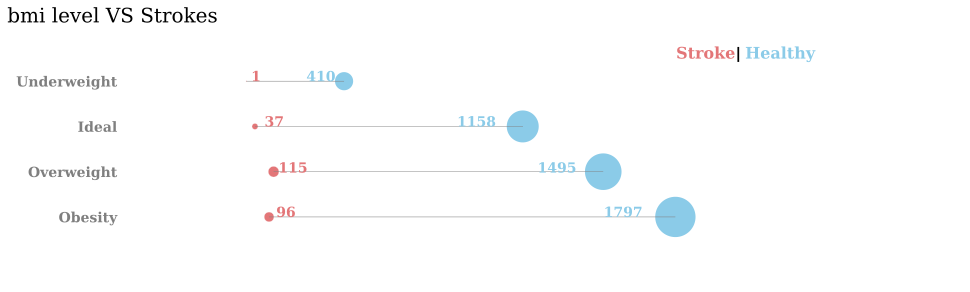

In [103]:
#  Visual for bmicose and storke 

fig = plt.figure(figsize = (15,5), dpi = 60)

gs = fig.add_gridspec(15,5)
gs.update(wspace = 1, hspace = 0.05)
ax1 = fig.add_subplot() #dumbbell plot

# axes list
axes = [ ax1]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#ffff')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#ffff')

# set x axis invisiable        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_bmi = df_eda[df_eda['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = df_eda[df_eda['stroke'] == 0].bmi_cat.value_counts()

# Take the result from the value count in list  and match it with a title for each result 
ax1.hlines(y = ['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin = [96,115,37,1], 
          xmax = [1797,1495,1159,410], color = 'grey',**{'linewidth':0.5})

# Normal scatter
sns.set_theme(style="white")
sns.scatterplot(y = stroke_bmi.index, x = stroke_bmi.values, s = stroke_bmi.values, color = '#E37678', ax= ax1, alpha = 1);
sns.scatterplot(y = healthy_bmi.index, x = healthy_bmi.values, s = healthy_bmi.values, color = '#8BCBE8', ax= ax1, alpha = 1);

# the x and y axis settings 
ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

# Labels of the result
ax1.set_yticklabels( labels = ['Obesity', 'Overweight', 'Ideal', 'Underweight'],fontdict = {'font':'Serif', 'fontsize':14,'fontweight':'bold', 'color':'black'},alpha = 0.5)

# Figure Title and conclusion
ax1.text(-1000,4.3, 'bmi level VS Strokes' ,{'font': 'Serif', 'Size': '20', 'color':'black'})
ax1.text(1800,3.5, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#E37678'})
ax1.text(2051,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2089,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#8BCBE8'})
# ax1.text(-750,-0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhere as negligible for younger people.', 
#         {'font':'Serif', 'size':'16','color': 'black'})


# Obesity
ax1.text(stroke_bmi.values[0] + 20 , 0.98, stroke_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[0] - 300,0, healthy_bmi.values[0], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})

# Overweighth
ax1.text(stroke_bmi.values[1] + 30,0, stroke_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[1] - 275 ,0.98, healthy_bmi.values[1], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})

#Ideal
ax1.text(stroke_bmi.values[2] + 40,2.0, stroke_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[2] - 275 ,2.0, healthy_bmi.values[2], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})

# Underweight
ax1.text(stroke_bmi.values[3] + 20,3.0, stroke_bmi.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#E37678'})
ax1.text(healthy_bmi.values[3] - 158 ,3.0, healthy_bmi.values[3], {'font':'Serif', 'Size':14, 'weight':'bold', 'color':'#8BCBE8'})


fig.show()

#### 3. Assumption: Smoking can induce Stroke, is it true?

In [104]:
# Code
smoke_group = df_eda.groupby('smoking_status')[['stroke']].sum()
smoke_group

,stroke
smoking_status,
Unknown,47
formerly smoked,70
never smoked,90
smokes,42


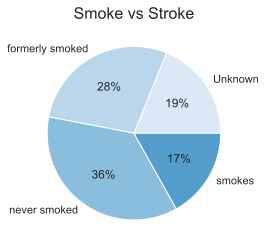

In [105]:
# Visual - pie
colors = sns.color_palette(palette='Blues')
plt.pie(smoke_group["stroke"], labels =smoke_group.index, autopct='%.0f%%', colors=colors);
plt.title('Smoke vs Stroke', size=16);

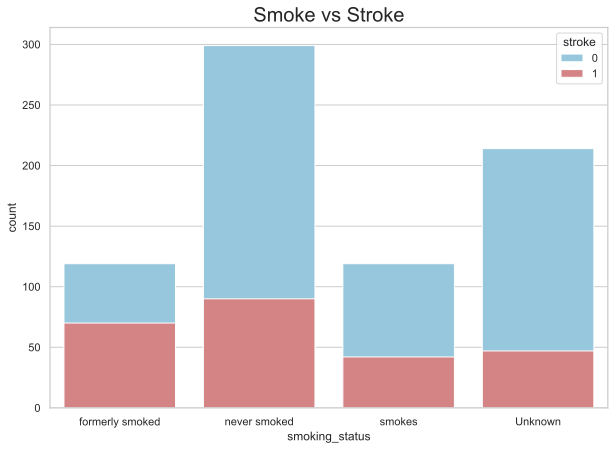

In [106]:
# Visual - bars
plt.figure(figsize = (10,7))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= "smoking_status" , hue= "stroke" , dodge=False, data= df_eda.head(1000) , palette=['#8BCBE8','#E37678'] );
plt.title('Smoke vs Stroke', size=20);

##### Big Figure

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-107-cb6b74d17307>:132: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-107-cb6b74d17307>:134: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



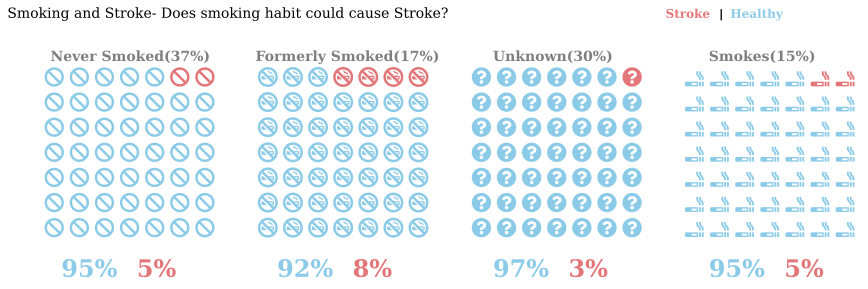

In [107]:
# Visual - icons

smoke = df['smoking_status'].value_counts()
stroke_smoke = df[df['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = df[df['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = int(round (stroke_smoke.values[0] / never * 100, 0))
stroke_unknown = int(round( stroke_smoke.values[2]  / unknown *100, 0))
stroke_former = int(round (stroke_smoke.values[1]  / former * 100, 0))
stroke_smokes = int(round( stroke_smoke.values[3]  / smokes *100, 0))

healthy_never = int(round(healthy_smoke.values[0] / never * 100, 0))
healthy_unknown = int(round(healthy_smoke.values[1] / unknown *100, 0))
healthy_former = int(round(healthy_smoke.values[2] / former * 100, 0))
healthy_smokes = int(round(healthy_smoke.values[3]/ smokes *100, 0))

# Percentage
never_per = int(round(never/(never+unknown+former+smokes) * 100, 0))
unknown_per = int(round(unknown/(never+unknown+former+smokes)* 100, 0))
former_per = int(round(former/(never+unknown+former+smokes) * 100, 0))
smokes_per = int(round(smokes/(never+unknown+former+smokes)* 100, 0))


# Figure
fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#ffff',dpi = 100,
                 
                 plots = {'141':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_never,healthy_never],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'ban',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '142' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_former,healthy_former],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'smoking-ban',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '143':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_unknown,healthy_unknown],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'question-circle',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '144' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_smokes,healthy_smokes],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'smoking',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
);

# Title + Paragraph
fig.text(0.1, 0.62, 'Smoking and Stroke- Does smoking habit could cause Stroke?', {'font':'Serif', 'size':14, 'color':'black'});

# Percentage healthy
fig.text(0.15, 0.38, '{}%'.format(healthy_never), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.35, 0.38, '{}%'.format(healthy_former), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);
fig.text(0.55, 0.38, '{}%'.format(healthy_unknown), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.75, 0.38, '{}%'.format(healthy_smokes), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);

# Percentage Unhealthy
fig.text(0.22, 0.38, '{}%'.format(stroke_never), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.42, 0.38, '{}%'.format(stroke_former), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#E37678'}, alpha = 1);
fig.text(0.62, 0.38, '{}%'.format(stroke_unknown), {'font':'Serif', 'size':24,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.82, 0.38, '{}%'.format(stroke_smokes), {'font':'Serif', 'size':24,'weight':'bold', 'color':'#E37678'}, alpha = 1);


# Labels
fig.text(0.14, 0.58, 'Never Smoked({}%)'.format(never_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.33, 0.58, "Formerly Smoked({}%)".format(former_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5);
fig.text(0.55, 0.58, 'Unknown({}%)'.format(unknown_per), {'font':'Serif', 'size':14,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.75, 0.58, "Smokes({}%)".format(smokes_per), {'font':'Serif', 'size':14,'weight':'bold', 'color':'black'}, alpha = 0.5);

# Legend
fig.text(0.71,0.62, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'});
fig.text(0.76,0.62, '|', {'color':'black' , 'size':'12', 'weight': 'bold'});
fig.text(0.77,0.62, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'},alpha = 1);


#### 4. Assumption: Heart with a Heart Disease is prone to Stroke, is it true?

In [108]:
# Code
heart_group = df_eda.groupby(['heart_disease' ,'stroke'], as_index=False)[['stroke']].count()
heart_group

,heart_disease,stroke
0,0,4631
1,0,202
2,1,229
3,1,47


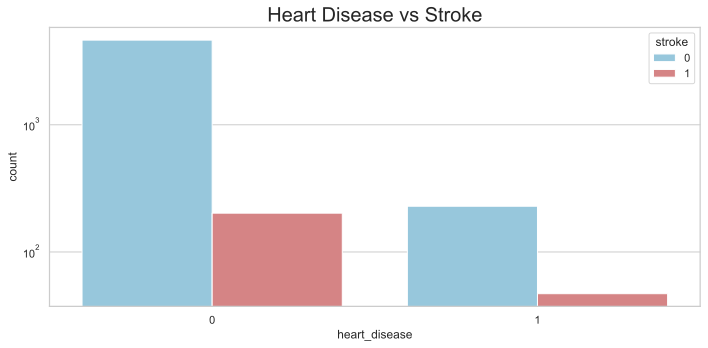

In [109]:
plt.figure(figsize = (10,5))
# Draw with seaborn
sns.countplot(x= "heart_disease" , hue= "stroke" , data= df_eda , palette=['#8BCBE8','#E37678'] );
plt.yscale('log');
plt.title('Heart Disease vs Stroke', size=20);
plt.tight_layout()

##### Big Figure

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-110-1321b5c7d4cb>:76: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-110-1321b5c7d4cb>:78: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



Text(1.04, 0.75, 'Healthy')

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



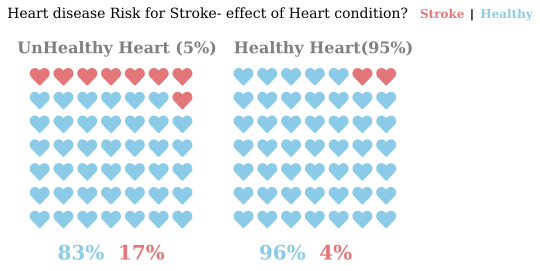

In [110]:

stroke_heart = df_eda[df_eda['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart = df_eda[df_eda['stroke'] == 0]['heart_disease'].value_counts()

no = df_eda['heart_disease'].value_counts().values[0]
yes =  df_eda['heart_disease'].value_counts().values[1]

stroke_no = int(round (stroke_heart.values[0] / no * 100, 0))
stroke_yes = int(round( stroke_heart.values[1] / yes *100, 0))
healthy_no = int(round(healthy_heart.values[0] / no * 100, 0))
healthy_yes = int(round(healthy_heart.values[1] / yes *100, 0))

no_per = int(round(no/(no+yes) * 100, 0))
yes_per = int(round(yes/(no+yes)* 100, 0))




fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (7,7),
                 facecolor = '#ffff',dpi = 100,
                 
                 plots = {'121':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_yes,healthy_yes],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'heart',
                              'icon_legend': False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                          },
                          
                          '122' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_no,healthy_no],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'heart',
                              'icon_legend' :False,
                              'icon_size':20,
                              'plot_anchor':'C',
                              'alpha':0.8,
                              'starting_location': 'NE'
                                                      
                           }
                         },
                   
);

# Title + Paragraph
fig.text(0.1, 0.75, 'Heart disease Risk for Stroke- effect of Heart condition?', {'font':'Serif', 'size':14, 'color':'black'})

# Percentage of Healthy
fig.text(0.20, 0.27, '{}%'.format(healthy_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,)
fig.text(0.60, 0.27, '{}%'.format(healthy_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1)

# Percentage of Un-Healthy
fig.text(0.32, 0.27, '{}%'.format(stroke_yes), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#E37678'},alpha = 1,)
fig.text(0.72, 0.27, '{}%'.format(stroke_no), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1)

# Labels
fig.text(0.12, 0.68, 'UnHealthy Heart ({}%)'.format(yes_per), {'font':'Serif', 'size':16,'weight':'bold' ,'color':'black'},alpha = 0.5,)
fig.text(0.55, 0.68, "Healthy Heart({}%)".format(no_per), {'font':'Serif', 'size':16,'weight':'bold', 'color':'black'}, alpha = 0.5)

fig.text(0.92,0.75, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'})
fig.text(1.02,0.75, '|', {'color':'black' , 'size':'12', 'weight': 'bold'})
fig.text(1.04,0.75, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'},alpha = 1)

 


#### 5. Assumption: Workload results in high blood pressure and that could lead to Stroke, is it true?

In [111]:
# Code
work_group = df_eda.groupby(['work_type' , 'hypertension'],as_index=False)[['stroke']].sum()
work_group

,work_type,hypertension,stroke
0,Govt_job,0,25
1,Govt_job,1,8
2,Never_worked,0,0
3,Private,0,116
4,Private,1,33
5,Self-employed,0,40
6,Self-employed,1,25
7,children,0,2


<Figure size 1080x504 with 0 Axes>

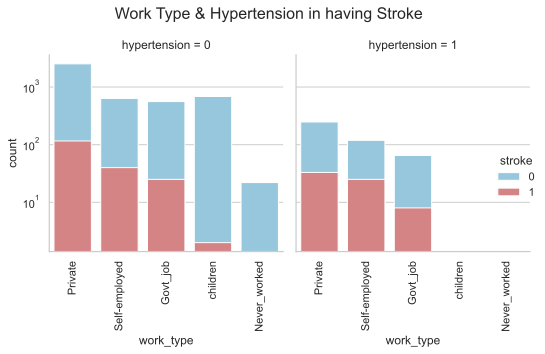

In [112]:
# # Visual - bars
plt.figure(figsize = (15,7))
sns.set_theme(style="whitegrid")
ax = sns.catplot(x= "work_type" ,hue='stroke', col="hypertension", dodge=False, aspect=.7, kind="count", data=df_eda , palette=['#8BCBE8','#E37678']);
ax.set_xticklabels(rotation=90)
plt.yscale('log');
ax.fig.suptitle('Work Type & Hypertension in having Stroke', size=16);
plt.tight_layout()

##### Big Figure

In [113]:
# Visual

work = df_eda['work_type'].value_counts()
stroke_work = df_eda[df_eda['stroke'] == 1]['work_type'].value_counts()
healthy_work = df_eda[df_eda['stroke'] == 0]['work_type'].value_counts()

private = work.values[0]
self =  work.values[1]
child = work.values[2]
gov = work.values[3]
never = work.values[4]

stroke_private = int(round (stroke_work.values[0] / private * 100, 0))
stroke_self = int(round( stroke_work.values[1]  / self *100, 0))
stroke_child = int(round (stroke_work.values[3]  / child * 100, 0))
stroke_gov = int(round( stroke_work.values[2]  / gov *100, 0))
stroke_never = int(round( 0, 0))

healthy_private = int(round(healthy_work.values[0] / private * 100, 0))
healthy_self = int(round(healthy_work.values[1] / self *100, 0))
healthy_child = int(round(healthy_work.values[2] / child * 100, 0))
healthy_gov = int(round(healthy_work.values[3]/ gov *100, 0))
healthy_never = int(round(healthy_work.values[4]/ never *100, 0))

private_per = int(round(private/(private+self+child+gov+never) * 100, 0))
self_per = int(round(self/(private+self+child+gov+never)* 100, 0))
child_per = int(round(child/(private+self+child+gov+never) * 100, 0))
gov_per = int(round(gov/(private+self+child+gov+never)* 100, 0))
never_per = int(round(never/(private+self+child+gov+never)* 100, 0))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/pywaffle/waffle.py:394: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-114-d77b25fd161d>:125: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

<ipython-input-114-d77b25fd161d>:127: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



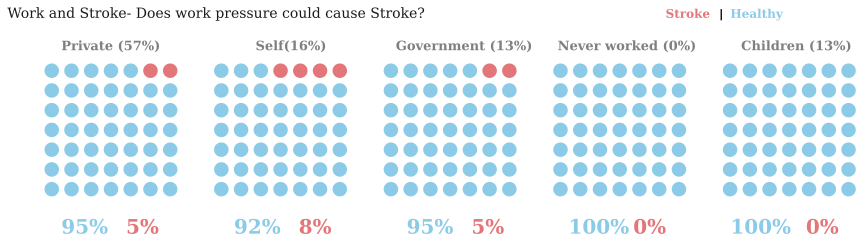

In [114]:
# figure

fig = plt.figure(FigureClass = Waffle, 
                 constrained_layout = True,
                 figsize = (15,15),
                 facecolor = '#ffff',dpi = 100,
                 
                 plots = {'151':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_private,healthy_private],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '152' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_self,healthy_self],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y':0.005,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '153':
                          {     
                           'rows':7,
                           'columns': 7,
                           'values' : [stroke_gov,healthy_gov],
                            'colors' : ['#E37678','#8BCBE8'],
                              'vertical' : True,
                              'interval_ratio_x': 0.005,
                              'interval_ratio_y': 0.005,
                              'icons' : 'circle',
                              'icon_legend': False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                          },
                          
                          '154' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_never,healthy_never],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           },
                          
                          '155' :
                          { 
                            'rows': 7,
                            'columns':7,
                            'values':[stroke_child,healthy_child],         
                              'colors' : ['#E37678','#8BCBE8'],
                              'vertical': True,
                              'interval_ratio_x': 0.006,
                              'interval_ratio_y':0.006,
                              'icons' : 'circle',
                              'icon_legend' :False,
                              'icon_size':15,
                              'plot_anchor':'C',
                              'alpha':0.2,
                              'starting_location': 'NE'
                                                      
                           }
                          
                         },
                   
);

# Title
fig.text(0.1, 0.60, 'Work and Stroke- Does work pressure could cause Stroke?', {'font':'Serif', 'size':14, 'color':'black'},alpha = 0.9)

# Percentage healthy
fig.text(0.15, 0.40, '{}%'.format(healthy_private), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.31, 0.40, '{}%'.format(healthy_self), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);
fig.text(0.47, 0.40, '{}%'.format(healthy_gov), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#8BCBE8'},alpha = 1,);
fig.text(0.62, 0.40, '{}%'.format(healthy_never), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);
fig.text(0.77, 0.40, '{}%'.format(healthy_child), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#8BCBE8'}, alpha = 1);

# Percentage Unhealthy
fig.text(0.21, 0.40, '{}%'.format(stroke_private), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.37, 0.40, '{}%'.format(stroke_self), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1);
fig.text(0.53, 0.40, '{}%'.format(stroke_gov), {'font':'Serif', 'size':20,'weight':'bold' ,'color':'#E37678'},alpha = 1,);
fig.text(0.68, 0.40, '{}%'.format(stroke_never), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1);
fig.text(0.84, 0.40, '{}%'.format(stroke_child), {'font':'Serif', 'size':20,'weight':'bold', 'color':'#E37678'}, alpha = 1);

# Labels
fig.text(0.15, 0.57, 'Private ({}%)'.format(private_per), {'font':'Serif', 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.33, 0.57, "Self({}%)".format(self_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5);
fig.text(0.46, 0.57, 'Government ({}%)'.format(gov_per), {'font':'Serif', 'size':13,'weight':'bold' ,'color':'black'},alpha = 0.5,);
fig.text(0.61, 0.57, "Never worked ({}%)".format(never_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5);
fig.text(0.78, 0.57, "Children ({}%)".format(child_per), {'font':'Serif', 'size':13,'weight':'bold', 'color':'black'}, alpha = 0.5) ; 

# Legend
fig.text(0.71,0.6, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '12','weight':'bold','style':'normal', 'color':'#E37678'});
fig.text(0.76,0.6, '|', {'color':'black' , 'size':'12', 'weight': 'bold'});
fig.text(0.77,0.6, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '12','style':'normal', 'weight':'bold','color':'#8BCBE8'},alpha = 1);

#### 6. Assumption: Males are most susceptible to strokes due to high work related stress, is it true

In [115]:
# Code
gender_group = df_eda.groupby('gender')[['stroke']].sum()
gender_group

,stroke
gender,
Female,141
Male,108


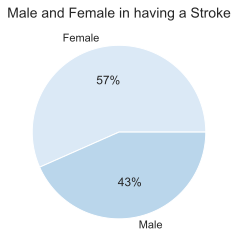

In [116]:
# Visual
colors = sns.color_palette(palette='Blues')
plt.pie(gender_group["stroke"], labels =gender_group.index, autopct='%.0f%%', colors=colors);
plt.title('Male and Female in having a Stroke', size=14);

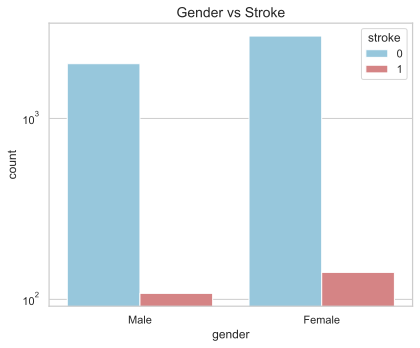

In [117]:
# Visual - bars
plt.figure(figsize = (6,5))
sns.set_theme(style="whitegrid")
sns.countplot(x= "gender" , hue= "stroke" , data= df_eda , palette=['#8BCBE8','#E37678'] );
plt.yscale('log');
plt.title('Gender vs Stroke', size=14);
plt.tight_layout()


# <hr>

## __Models:__

### Pre-processing

#### Add Categorical Data

In [118]:
# Add categorical data
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

# feature log transformations 
df['age'] = df['age'].apply(lambda x: np.log(x+10)*3)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df['bmi'] = df['bmi'].apply(lambda x: np.log(x+10)*2)

#### Clean Data

In [119]:
# drop other from gender
df = df [~ df.gender.str.contains('Other')]

# Drop null in bmi
df = df[~ df.bmi.isna()]

In [120]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,glucose_cat,age_cat
0,9046,Male,13.031416,0,1,Yes,Private,Urban,10.950331,7.683201,formerly smoked,1,Obesity,High,Elderly
2,31112,Male,13.499429,0,1,Yes,Private,Rural,9.505801,7.499008,never smoked,1,Obesity,Normal,Elderly
3,60182,Female,12.232612,0,0,Yes,Private,Urban,10.399534,7.586479,smokes,1,Obesity,High,Mid Adults
4,1665,Female,13.465909,1,0,Yes,Self-employed,Rural,10.431175,7.052721,never smoked,1,Ideal,High,Elderly
5,56669,Male,13.532579,0,0,Yes,Private,Urban,10.558371,7.327123,formerly smoked,1,Overweight,High,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,9.406483,0,0,No,children,Rural,9.456191,6.706813,Unknown,0,Underweight,Normal,Children
5106,44873,Female,13.532579,0,0,Yes,Self-employed,Urban,9.813510,7.824046,never smoked,0,Obesity,Normal,Elderly
5107,19723,Female,11.419987,0,0,Yes,Self-employed,Rural,9.064984,7.407536,never smoked,0,Obesity,Low,Adults
5108,37544,Male,12.332622,0,0,Yes,Private,Rural,10.344261,7.144691,formerly smoked,0,Overweight,High,Mid Adults


#### Scalar & Encoder

In [121]:
# # preprocessing - label enconding and numerical value scaling
ss = StandardScaler()
le = preprocessing.LabelEncoder()

# label enconding
ordinal = ['age_cat',  'glucose_cat', 'bmi_cat','hypertension', 'heart_disease'] 
binary = ['gender', 'ever_married', 'Residence_type',]
nominal =  ['work_type', 'smoking_status'] 
numerical = ['age','bmi', 'avg_glucose_level'] 

## label encoding of ordinal categorical features
for col in ordinal:
    df[col] = le.fit_transform(df[col])
    
## normalizing with standard scaler of numerical features
df[numerical] = ss.fit_transform(df[numerical])

for col in binary:
    df[col] = pd.get_dummies(df[col], drop_first=True)

## norminal data one hot encoding for categorical features
for col in nominal:
    df[col] = le.fit_transform(df[col])


#### Feature Operation

In [122]:
X = df.drop(['stroke','id'], axis = 1)
y = df['stroke']

##### Feature Importance

[0.03650027 0.19000265 0.02561813 0.02396933 0.01851058 0.06779198
 0.04729379 0.19339353 0.17504392 0.08784068 0.05359535 0.04582377
 0.03461602]


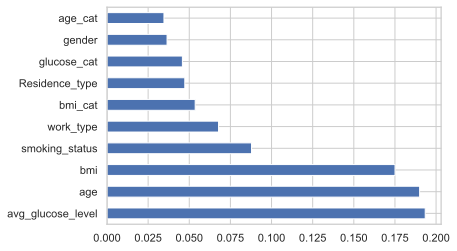

In [123]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns);
feat_importances.nlargest(10).plot(kind='barh');
plt.show();

##### Correlation Matrix

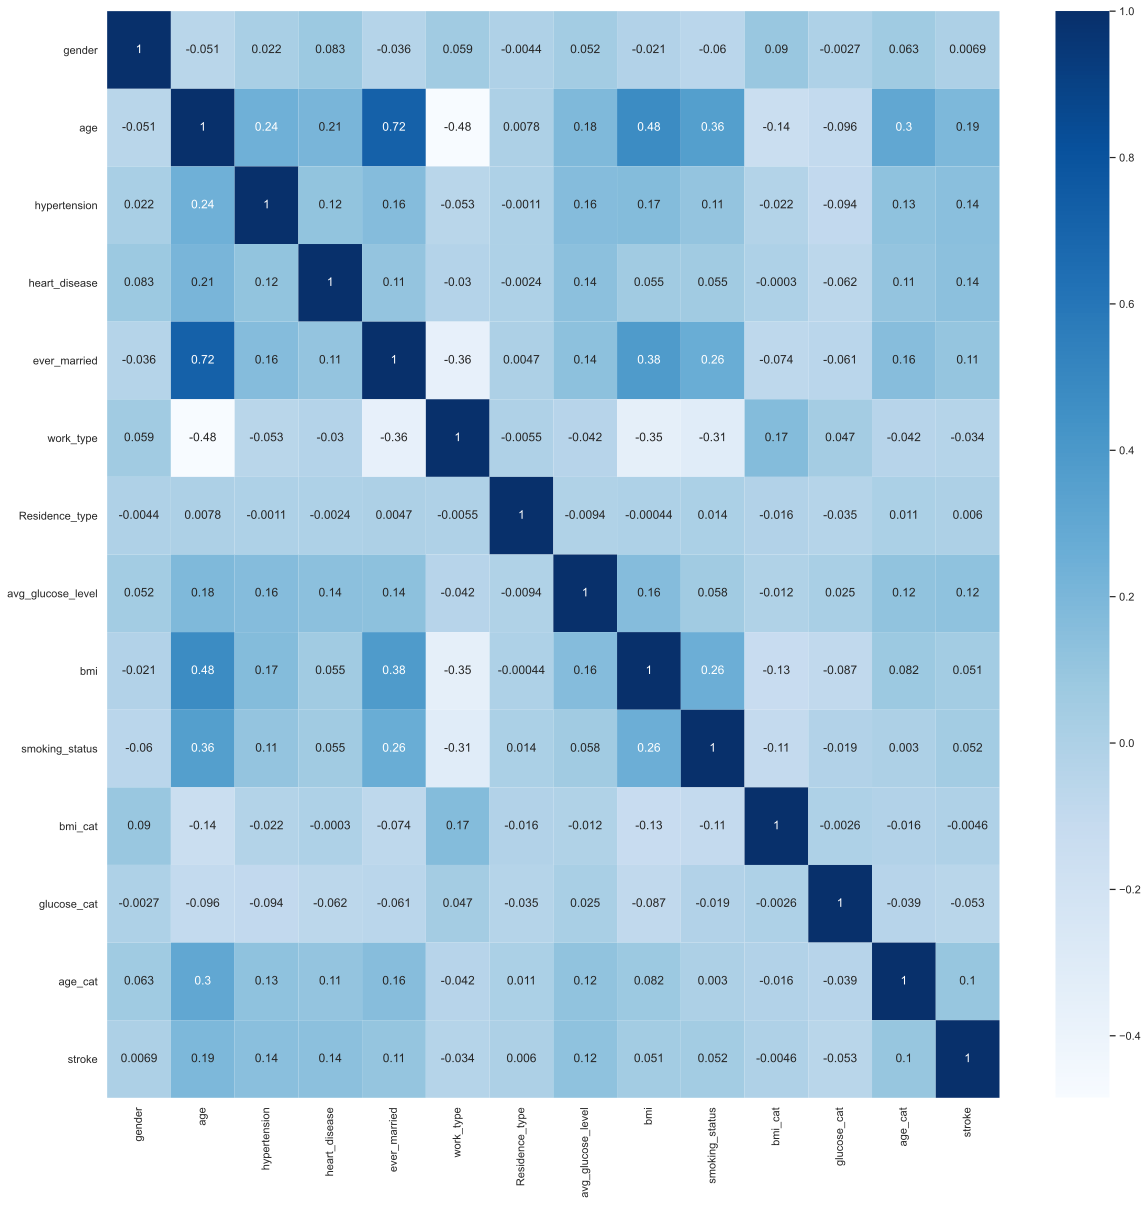

In [124]:
#get correlations of each features in dataset
df_matrix = pd.concat([X,y], axis = 1)
corrmat = df_matrix.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_matrix.corr(),annot=True,cmap="Blues")

### Split Data

In [125]:
# Input features
X = df.loc[:,['age', 'hypertension', 'ever_married', 'heart_disease']]

# Output target
y = df['stroke']

# Split the data 80 - 20 train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)

### SMOTE

In [126]:
# Define model
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

#### GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       929
           1       0.14      0.74      0.24        53

    accuracy                           0.75       982
   macro avg       0.56      0.74      0.54       982
weighted avg       0.94      0.75      0.82       982





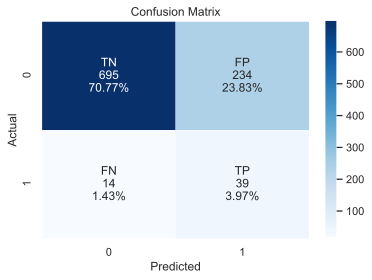

In [127]:
gboost = GradientBoostingClassifier(n_estimators=3, learning_rate=0.5, max_depth=5, random_state=0)

gboost.fit(X_res, y_res)
predictions = gboost.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)

# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       929
           1       0.17      0.74      0.27        53

    accuracy                           0.79       982
   macro avg       0.57      0.76      0.58       982
weighted avg       0.94      0.79      0.84       982





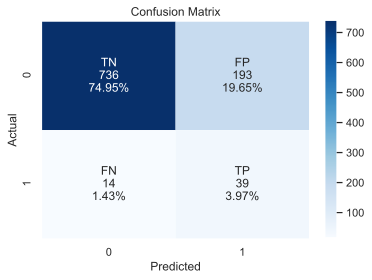

In [128]:
clf = GradientBoostingClassifier()

clf.fit(X_res, y_res)
predictions = clf.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### KNN

In [129]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
Best_knn = clf.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('Best leaf_size:', Best_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', Best_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', Best_knn.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 7
Best p: 1
Best n_neighbors: 3


              precision    recall  f1-score   support

           0       0.96      0.91      0.94       929
           1       0.19      0.38      0.26        53

    accuracy                           0.88       982
   macro avg       0.58      0.64      0.60       982
weighted avg       0.92      0.88      0.90       982





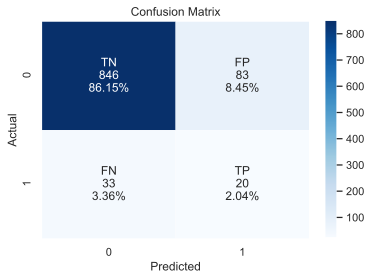

In [130]:
predictions = Best_knn.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');


#### logisticRegression

In [131]:

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
lreg = LogisticRegression()

lrr = GridSearchCV(lreg, param_grid = param_grid, verbose=True, n_jobs=-1)
#Fit the model
best_model = lrr.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best penalty: l1
Best C: 0.012742749857031334
Best max_iter: 100
Best Solver: liblinear


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [      nan       nan 0.5       ...       nan 0.7627321 0.7627321]



              precision    recall  f1-score   support

           0       0.99      0.69      0.81       929
           1       0.14      0.87      0.24        53

    accuracy                           0.70       982
   macro avg       0.56      0.78      0.53       982
weighted avg       0.94      0.70      0.78       982





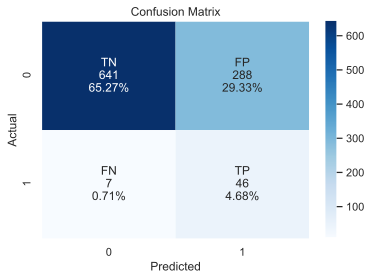

In [132]:
predictions = lrr.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### SVM

In [133]:
# defining parameter range
param_grid = {'C': [0.1, 1],#soft margin
              'gamma': [1, 0.01],
              'kernel': ['rbf','poly','linear']}

svmm = svm.SVC()
grid = GridSearchCV(svmm, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
best_svm = grid.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('C:', best_svm.best_estimator_.get_params()['C'])
print('gamma :', best_svm.best_estimator_.get_params()['gamma'])
print('kernel:', best_svm.best_estimator_.get_params()['kernel'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.6s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   2.2s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   1.5s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   2.4s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   1.5s
[CV 2/5] END ..................C=0.1, gamma=1, k

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       929
           1       0.14      0.91      0.25        53

    accuracy                           0.70       982
   macro avg       0.57      0.80      0.53       982
weighted avg       0.95      0.70      0.78       982





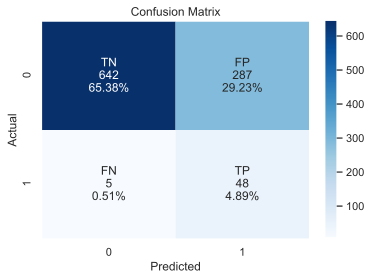

In [134]:
predictions = best_svm.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.99      0.68      0.80       929
           1       0.14      0.91      0.24        53

    accuracy                           0.69       982
   macro avg       0.57      0.79      0.52       982
weighted avg       0.95      0.69      0.77       982





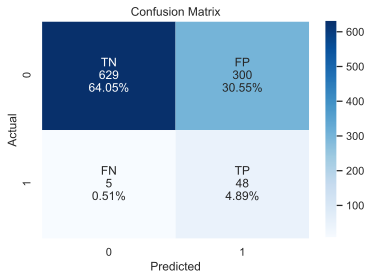

In [135]:
svmm = svm.SVC(C=3,gamma=0.1,kernel='rbf')
svmm.fit(X_res, y_res)
predictions = svmm.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       929
           1       0.15      0.91      0.25        53

    accuracy                           0.71       982
   macro avg       0.57      0.80      0.54       982
weighted avg       0.95      0.71      0.79       982





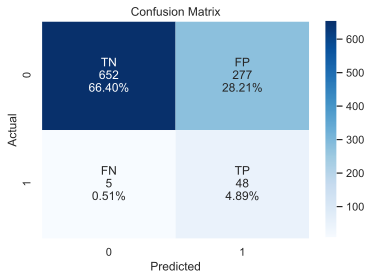

In [136]:
svmm = svm.SVC(C=3,gamma=0.01,kernel='rbf')
svmm.fit(X_res, y_res)
predictions = svmm.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)

# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### XG

In [137]:
# defining parameter range
param_grid_xbg = {}
   
xgbc = XGBClassifier()
grid_xbg= GridSearchCV(xgbc, param_grid_xbg, refit = True, verbose = 3)
 
# fitting the model for grid_xbg search
best_model = grid_xbg.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('gamma :', best_model.best_estimator_.get_params()['gamma'])
print('Booster:', best_model.best_estimator_.get_params()['booster'])
print('learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[05:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END ................................................ total time=   0.3s
[05:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END ................................................ total time=   0.3s
[05:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END ................................................ total time=   0.3s
[05:37:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END ................................................ total time=   0.3s
[05:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END ................................................ total time=   0.3s
[05:37:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



max_depth: 6
gamma : 0
Booster: gbtree
learning_rate: 0.300000012


In [138]:
# defining parameter range
param_grid_xbg = {'max_depth': [3, 5, 7],#soft margin
              'gamma': [0.01,0.1,1],
              'booster': ['gbtree','gblinear'],
              'learning_rate':[0.01,0.1,0.2,0.3]}
   
xgbc = XGBClassifier()
grid_xbg = GridSearchCV(xgbc, param_grid_xbg, refit = True, verbose = 3)
 
# fitting the model for grid_xbg search
best_model = grid_xbg.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('gamma :', best_model.best_estimator_.get_params()['gamma'])
print('Booster:', best_model.best_estimator_.get_params()['booster'])
print('learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[05:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[05:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.5s
[05:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.3s
[05:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.4s
[05:37:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.5s
[05:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.5s
[05:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.5s
[05:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.5s
[05:37:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.5s
[05:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.2s
[05:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.4s
[05:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[05:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[05:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.4s
[05:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.3s
[05:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[05:37:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.2s
[05:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.4s
[05:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.5s
[05:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.5s
[05:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.3s
[05:37:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[05:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.4s
[05:37:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.5s
[05:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.4s
[05:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.3s
[05:37:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.4s
[05:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[05:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.2s
[05:37:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.2s
[05:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.3s
[05:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.3s
[05:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.3s
[05:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.5s
[05:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.5s
[05:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[05:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[05:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[05:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[05:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[05:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[05:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[05:37:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[05:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[05:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[05:37:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[05:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.2s
[05:37:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.2s
[05:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.3s
[05:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.4s
[05:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.3s
[05:37:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[05:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[05:37:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.4s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.0s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.0s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.0s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.0s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.0s
[05:37:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.0s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.0s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.1s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.1s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.1s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.0s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.0s
[05:37:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.2s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.1s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.1s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.0s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.1s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 4/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.1s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.0s
[05:38:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.0s
[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.1s
[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.1s
[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.0s
[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.0s
[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.0s
[05:38:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.1s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.0s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.1s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.0s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.0s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.1s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.1s
[05:38:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.1s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.0s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.1s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.1s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.1s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.1s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.1s
[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.1s
[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.1s
[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.1s
[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.0s
[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicit

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.0s
[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitl

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.1s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
 

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.0s
[05:38:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.1s
[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.0s
[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.1s
[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.0s
[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.0s
[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
 

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.0s
[05:38:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
 

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.1s
[05:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.1s
[05:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

max_depth: 7
gamma : 0.1
Booster: gbtree
learning_rate: 0.3


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[05:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    rec

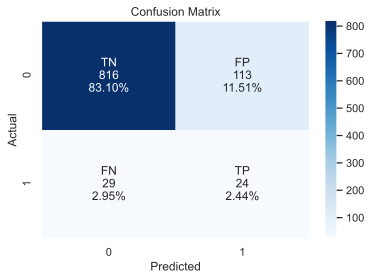

In [139]:
xgbc = XGBClassifier()
print(xgbc)
xgbc.fit(X_res, y_res)
ypred = xgbc.predict(X_test);


print(classification_report(y_test, ypred));
print('\n')
matrix = confusion_matrix(y_test, ypred)

# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       929
           1       0.18      0.43      0.25        53

    accuracy                           0.86       982
   macro avg       0.57      0.66      0.59       982
weighted avg       0.92      0.86      0.89       982





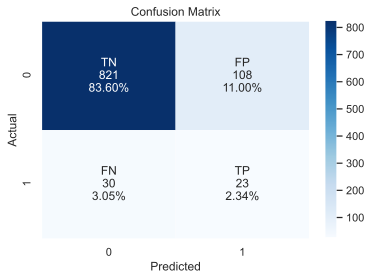

In [140]:
ypred = grid_xbg.predict(X_test);


print(classification_report(y_test, ypred));
print('\n')
matrix = confusion_matrix(y_test, ypred)

# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### LGBM

In [141]:
param_grid = {'max_depth': [3, 5, 7],#soft margin
              'objective': ['binary'],
              'n_estimators':[2,3,5]}



lgbm = LGBMClassifier()
lgbmn = GridSearchCV(lgbm, param_grid = param_grid)
#Fit the model
best_model = lgbmn.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('objective :', best_model.best_estimator_.get_params()['objective'])
print('n_estimators :', best_model.best_estimator_.get_params()['n_estimators'])


max_depth: 7
objective : binary
n_estimators : 5


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       929
           1       0.19      0.53      0.28        53

    accuracy                           0.86       982
   macro avg       0.58      0.70      0.60       982
weighted avg       0.93      0.86      0.89       982





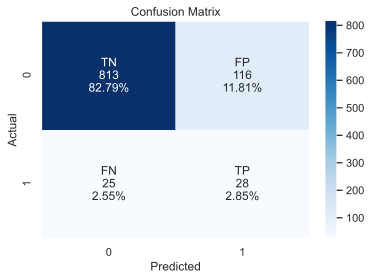

In [142]:
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
print('\n')
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       929
           1       0.15      0.75      0.25        53

    accuracy                           0.76       982
   macro avg       0.57      0.76      0.56       982
weighted avg       0.94      0.76      0.82       982





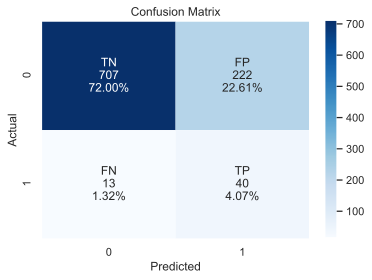

In [143]:
lgbm = LGBMClassifier(objective='binary', max_depth=5 ,n_estimators=3)
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
print('\n')
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### RandomForest

In [144]:
param_grid = { 
    'n_estimators': [10,20,30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,8],
    
}

rf = RandomForestClassifier()
rfit = rf.fit(X_res, y_res)
RF = GridSearchCV(rfit, param_grid = param_grid,n_jobs=4)
#Fit the model
RF_best = RF.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', RF_best.best_estimator_.get_params()['max_depth'])
print('max_features :', RF_best.best_estimator_.get_params()['max_features'])
print('n_estimators :', RF_best.best_estimator_.get_params()['n_estimators'])

                     

max_depth: 8
max_features : auto
n_estimators : 10


              precision    recall  f1-score   support

           0       0.97      0.79      0.87       929
           1       0.15      0.62      0.24        53

    accuracy                           0.78       982
   macro avg       0.56      0.71      0.56       982
weighted avg       0.93      0.78      0.84       982



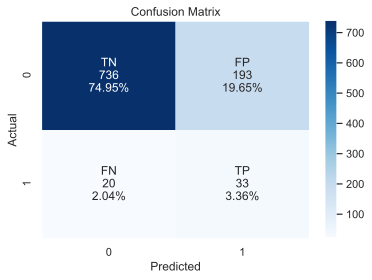

In [145]:
RF_best.fit(X_res,y_res)
y_pred=RF_best.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### DST

In [146]:
param_grid = {
    'min_samples_split': [2, 4, 8],
    'max_depth' : [4,5,6,7,8]
    
}
dt = DecisionTreeClassifier(random_state=3,max_depth=5) 
dt_model = dt.fit(X_res,y_res)
DT = GridSearchCV(dt_model, param_grid = param_grid,n_jobs=4)
#Fit the model
DT_best = DT.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('min_samples_split:', RF_best.best_estimator_.get_params()['min_samples_split'])
print('max_depth :', RF_best.best_estimator_.get_params()['max_depth'])


min_samples_split: 2
max_depth : 8


              precision    recall  f1-score   support

           0       0.98      0.80      0.88       929
           1       0.16      0.64      0.25        53

    accuracy                           0.79       982
   macro avg       0.57      0.72      0.57       982
weighted avg       0.93      0.79      0.85       982



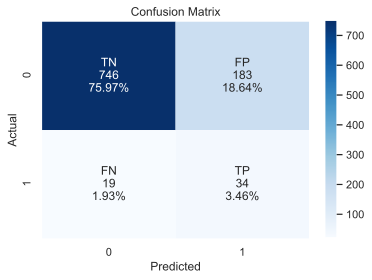

In [147]:
y_pred = DT_best.predict(X_test)
print(classification_report(y_test, y_pred));
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       929
           1       0.16      0.40      0.23        53

    accuracy                           0.86       982
   macro avg       0.56      0.64      0.58       982
weighted avg       0.92      0.86      0.88       982



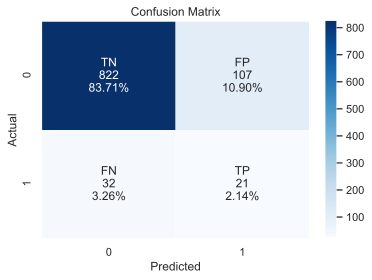

In [148]:
dt = DecisionTreeClassifier() 
dt_model = dt.fit(X_res,y_res)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred));
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### NB

In [149]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}


gnb = GaussianNB()
gnbf = gnb.fit(X_res, y_res)
gnbgr = GridSearchCV(gnbf, param_grid = param_grid,n_jobs=4)
#Fit the model
gnb_best = gnbgr.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('var_smoothing:', gnb_best.best_estimator_.get_params()['var_smoothing'])                    

var_smoothing: 0.002848035868435802


              precision    recall  f1-score   support

           0       0.99      0.65      0.79       929
           1       0.13      0.91      0.23        53

    accuracy                           0.67       982
   macro avg       0.56      0.78      0.51       982
weighted avg       0.95      0.67      0.76       982



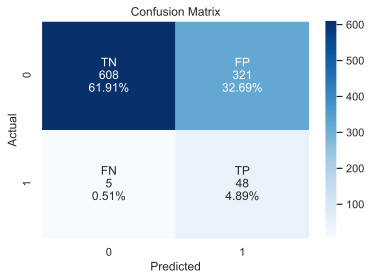

In [150]:

y_pred = gnb_best.predict(X_test)
print(classification_report(y_test, y_pred));
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

### SMOTE+Tomek


In [151]:
# Define model
smt = SMOTETomek()
X_res, y_res = smt.fit_resample(X_train, y_train)

#### GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       929
           1       0.15      0.75      0.25        53

    accuracy                           0.76       982
   macro avg       0.57      0.76      0.56       982
weighted avg       0.94      0.76      0.82       982





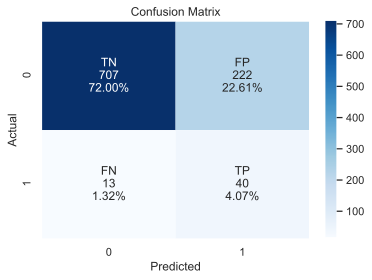

In [152]:

gboost = GradientBoostingClassifier(n_estimators=3, learning_rate=0.5,
max_depth=5, random_state=0)

gboost.fit(X_res, y_res)
predictions = gboost.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       929
           1       0.17      0.72      0.27        53

    accuracy                           0.79       982
   macro avg       0.57      0.76      0.58       982
weighted avg       0.94      0.79      0.85       982





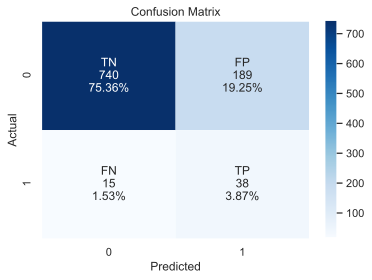

In [153]:

gboost = GradientBoostingClassifier()

gboost.fit(X_res, y_res)
predictions = gboost.predict(X_test)
# print classification report
print(classification_report(y_test, predictions))

print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### KNN

In [154]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
Best_knn = clf.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('Best leaf_size:', Best_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', Best_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', Best_knn.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 7
Best p: 1
Best n_neighbors: 1


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       929
           1       0.21      0.53      0.30        53

    accuracy                           0.87       982
   macro avg       0.59      0.71      0.62       982
weighted avg       0.93      0.87      0.89       982





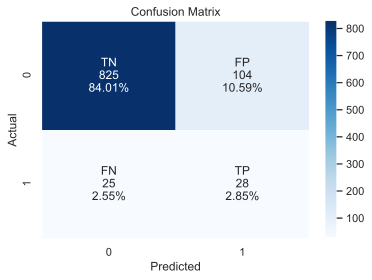

In [155]:
predictions = Best_knn.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### logisticRegression

In [156]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
lreg = LogisticRegression()

lrr = GridSearchCV(lreg, param_grid = param_grid, verbose=True, n_jobs=-1)
#Fit the model
best_logreg = lrr.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('Best penalty:', best_logreg.best_estimator_.get_params()['penalty'])
print('Best C:', best_logreg.best_estimator_.get_params()['C'])
print('Best max_iter:', best_logreg.best_estimator_.get_params()['max_iter'])
print('Best Solver:', best_logreg.best_estimator_.get_params()['solver'])

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best penalty: l2
Best C: 0.004832930238571752
Best max_iter: 100
Best Solver: liblinear


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan        nan 0.5        ...        nan 0.76623974 0.76623974]



              precision    recall  f1-score   support

           0       0.99      0.65      0.79       929
           1       0.13      0.92      0.23        53

    accuracy                           0.67       982
   macro avg       0.56      0.79      0.51       982
weighted avg       0.95      0.67      0.76       982





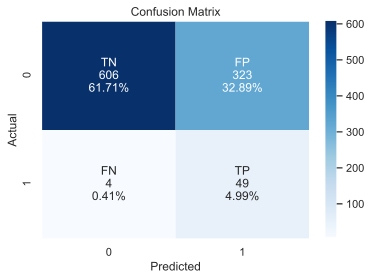

In [157]:
predictions = best_logreg.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### SVM

In [158]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],#soft margin
              'gamma': [1, 0.01],
              'kernel': ['rbf','poly','linear']}

svmm = svm.SVC()
grid = GridSearchCV(svmm, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
best_svm = grid.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('C:', best_svm.best_estimator_.get_params()['C'])
print('gamma :', best_svm.best_estimator_.get_params()['gamma'])
print('kernel:', best_svm.best_estimator_.get_params()['kernel'])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.9s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.2s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   1.7s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   2.5s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   1.6s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   3.2s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   1.8s
[CV 2/5] END ..................C=0.1, gamma=1, k

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       929
           1       0.16      0.77      0.26        53

    accuracy                           0.77       982
   macro avg       0.57      0.77      0.56       982
weighted avg       0.94      0.77      0.83       982





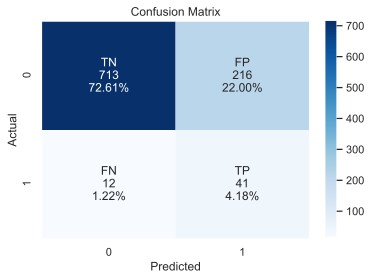

In [159]:
predictions = best_svm.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### XG

In [160]:
# defining parameter range
param_grid_xbg = {'max_depth': [3, 5, 7],#soft margin
              'gamma': [0.01,0.1,1],
              'booster': ['gbtree','gblinear'],
              'learning_rate':[0.01,0.1,0.2,0.3]}

xgbc = XGBClassifier()
grid_xbg = GridSearchCV(xgbc, param_grid_xbg, refit = True, verbose = 3)
 
# fitting the model for grid_xbg search
best_model = grid_xbg.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('gamma :', best_model.best_estimator_.get_params()['gamma'])
print('Booster:', best_model.best_estimator_.get_params()['booster'])
print('learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[06:08:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.3s
[06:08:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.5s
[06:08:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.5s
[06:08:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.5s
[06:08:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.5s
[06:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:08:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.3s
[06:08:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:08:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:08:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:08:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:08:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:08:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:08:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:08:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:08:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.4s
[06:08:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.4s
[06:08:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.4s
[06:08:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.4s
[06:08:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.4s
[06:08:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.3s
[06:08:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.3s
[06:08:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.3s
[06:08:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[06:08:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:08:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[06:08:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[06:08:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[06:08:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.3s
[06:08:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:08:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:08:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:08:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:08:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:08:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.5s
[06:08:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:08:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:08:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:08:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:08:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:08:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:08:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:08:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:08:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:08:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:08:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.5s
[06:08:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:08:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:08:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.4s
[06:08:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.4s
[06:08:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:08:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:08:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:08:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:09:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:09:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:09:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.2s
[06:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.2s
[06:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.3s
[06:09:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:09:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:09:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:09:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:09:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:09:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:09:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.4s
[06:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=3; total time=   0.2s
[06:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:09:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:09:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:09:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:09:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=5; total time=   0.3s
[06:09:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:09:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:09:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.4s
[06:09:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.5s
[06:09:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.5s
[06:09:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.2s
[06:09:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:09:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:09:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[06:09:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.3s
[06:09:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.2s
[06:09:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.4s
[06:09:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.3s
[06:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.2s
[06:09:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.3s
[06:09:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.2s
[06:09:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.3s
[06:09:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:09:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:09:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:09:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.4s
[06:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.2s
[06:09:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.3s
[06:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.2s
[06:09:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 1/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.4s
[06:09:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 2/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.4s
[06:09:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 3/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 4/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[CV 5/5] END booster=gbtree, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.3s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=3; total time=   0.0s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.1s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 5/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=5; total time=   0.0s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.01, max_depth=7; total time=   0.0s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=3; total time=   0.0s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explici

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=5; total time=   0.0s
[06:09:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.0s
[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.1, max_depth=7; total time=   0.0s
[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=3; total time=   0.0s
[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.0s
[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=5; total time=   0.0s
[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.01, learning_rate=0.2, max_depth=7; total time=   0.0s
[06:09:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=5; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings bu

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=0.01, learning_rate=0.3, max_depth=7; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 4/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=3; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 5/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=5; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=0.1, learning_rate=0.01, max_depth=7; total time=   0.0s
[06:09:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be u

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=3; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=5; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.1, max_depth=7; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=3; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=5; total time=   0.0s
[06:09:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.2, max_depth=7; total time=   0.0s
[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.0s
[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=3; total time=   0.0s
[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 4/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.0s
[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=5; total time=   0.0s
[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be use

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=0.1, learning_rate=0.3, max_depth=7; total time=   0.0s
[06:09:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.01, max_depth=7; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=3; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=5; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=1, learning_rate=0.1, max_depth=7; total time=   0.0s
[06:09:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 5/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=3; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=5; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 1/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.2, max_depth=7; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 2/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=3; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 3/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=5; total time=   0.0s
[06:09:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future re

[CV 4/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.1s
[06:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END booster=gblinear, gamma=1, learning_rate=0.3, max_depth=7; total time=   0.0s
[06:09:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric 

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



max_depth: 7
gamma : 0.01
Booster: gbtree
learning_rate: 0.3


              precision    recall  f1-score   support

           0       0.96      0.88      0.92       929
           1       0.17      0.42      0.24        53

    accuracy                           0.86       982
   macro avg       0.57      0.65      0.58       982
weighted avg       0.92      0.86      0.88       982





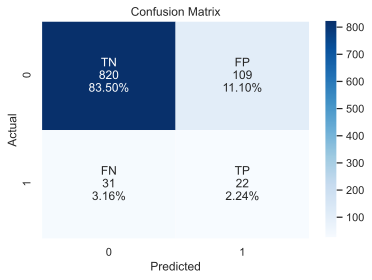

In [161]:
ypred = grid_xbg.predict(X_test);


print(classification_report(y_test, ypred));
print('\n')
matrix = confusion_matrix(y_test, ypred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### LGBM

In [162]:
param_grid = {'max_depth': [3, 5, 7],#soft margin
              'objective': ['binary'],
              'n_estimators':[2,3,5]}



lgbm = LGBMClassifier()
lgbmn = GridSearchCV(lgbm, param_grid = param_grid)
#Fit the model
best_lgbm = lgbmn.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', best_lgbm.best_estimator_.get_params()['max_depth'])
print('objective :', best_lgbm.best_estimator_.get_params()['objective'])
print('n_estimators :', best_lgbm.best_estimator_.get_params()['n_estimators'])


max_depth: 7
objective : binary
n_estimators : 5


              precision    recall  f1-score   support

           0       0.98      0.79      0.88       929
           1       0.17      0.72      0.27        53

    accuracy                           0.79       982
   macro avg       0.57      0.76      0.57       982
weighted avg       0.94      0.79      0.84       982





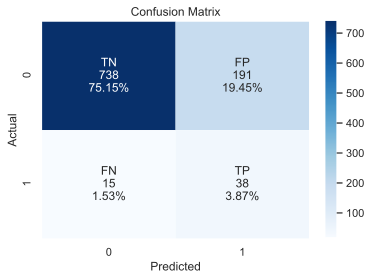

In [163]:
# from lightgbm import LGBMClassifier
best_lgbm.fit(X_res, y_res)
y_pred = best_lgbm.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
print('\n')
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       929
           1       0.14      0.72      0.24        53

    accuracy                           0.75       982
   macro avg       0.56      0.74      0.54       982
weighted avg       0.93      0.75      0.82       982





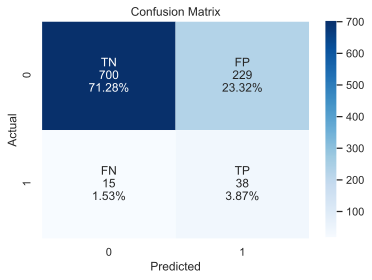

In [164]:
# from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='binary', max_depth=5 ,n_estimators=3)
lgbm.fit(X_res, y_res)
y_pred = lgbm.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))
print('\n')
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### RandomForest

In [165]:
param_grid = { 
    'n_estimators': [10,20,30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    
}


rf = RandomForestClassifier()
rfit = rf.fit(X_res, y_res)
RF = GridSearchCV(rfit, param_grid = param_grid,n_jobs=4)
#Fit the model
RF_best = RF.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('max_depth:', RF_best.best_estimator_.get_params()['max_depth'])
print('max_features :', RF_best.best_estimator_.get_params()['max_features'])
print('n_estimators :', RF_best.best_estimator_.get_params()['n_estimators'])

                     

max_depth: 8
max_features : log2
n_estimators : 20


              precision    recall  f1-score   support

           0       0.97      0.80      0.88       929
           1       0.14      0.58      0.23        53

    accuracy                           0.79       982
   macro avg       0.56      0.69      0.55       982
weighted avg       0.93      0.79      0.84       982



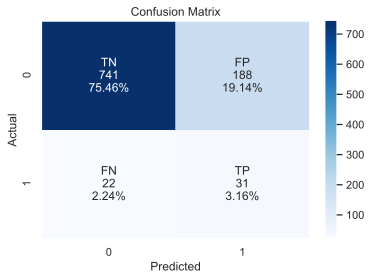

In [166]:
RF_best.fit(X_res,y_res)
y_pred=RF_best.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### DT

In [167]:
param_grid = {
    'min_samples_split': [2, 4, 8],
    'max_depth' : [4,5,6,7,8]
    
}
dt = DecisionTreeClassifier(random_state=3,max_depth=5) 
dt_model = dt.fit(X_res,y_res)
DT = GridSearchCV(dt_model, param_grid = param_grid,n_jobs=4)
#Fit the model
DT_best = DT.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('min_samples_split:', DT_best.best_estimator_.get_params()['min_samples_split'])
print('max_depth :', DT_best.best_estimator_.get_params()['max_depth'])


min_samples_split: 2
max_depth : 8


              precision    recall  f1-score   support

           0       0.98      0.83      0.90       929
           1       0.18      0.66      0.28        53

    accuracy                           0.82       982
   macro avg       0.58      0.74      0.59       982
weighted avg       0.93      0.82      0.86       982



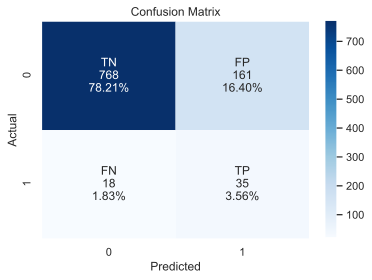

In [168]:
y_pred = DT_best.predict(X_test)
print(classification_report(y_test, y_pred));
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       929
           1       0.17      0.40      0.24        53

    accuracy                           0.86       982
   macro avg       0.57      0.64      0.58       982
weighted avg       0.92      0.86      0.89       982



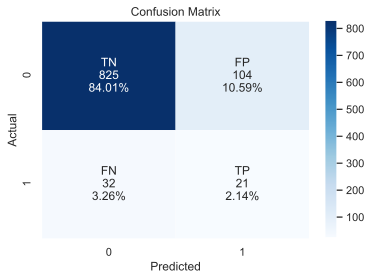

In [169]:
dt = DecisionTreeClassifier() 
dt_model = dt.fit(X_res,y_res)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred));
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

#### NB

In [170]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}


gnb = GaussianNB()
gnbf = gnb.fit(X_res, y_res)
gnbgr = GridSearchCV(gnbf, param_grid = param_grid,n_jobs=4)
#Fit the model
gnb_best = gnbgr.fit(X_res, y_res)
#Print The value of best Hyperparameters
print('var_smoothing:', gnb_best.best_estimator_.get_params()['var_smoothing'])                    

var_smoothing: 0.008111308307896872


              precision    recall  f1-score   support

           0       0.99      0.67      0.80       929
           1       0.13      0.91      0.23        53

    accuracy                           0.68       982
   macro avg       0.56      0.79      0.51       982
weighted avg       0.95      0.68      0.77       982



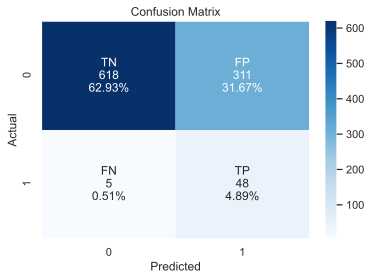

In [171]:

y_pred = gnb_best.predict(X_test)
print(classification_report(y_test, y_pred));
matrix = confusion_matrix(y_test, y_pred)
# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

### Stacking

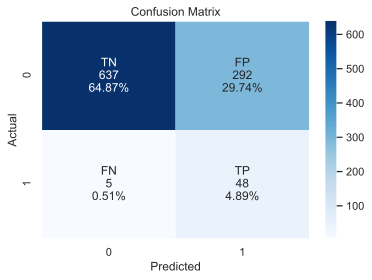

In [68]:
# The parameters inside the models can be varied 
params = {'n_estimators': 3,
          'max_depth': 5,
          'learning_rate': 0.5
          }

# logistic parameters
param_grid_log = {'penalty' :'l1',
    'C' :0.004832930238571752,
    'solver' : 'liblinear',
    'max_iter' :100
    }

lr = LogisticRegression(**param_grid_log)

GB_model= GradientBoostingClassifier(**params) 
RF_model = RandomForestClassifier(n_estimators=3, max_depth=5)
DT_model = DecisionTreeClassifier(random_state=3,max_depth=5)
SVM_model = svm.SVC(C=3,gamma=0.1,kernel='rbf')
LGBM_model = LGBMClassifier(objective='binary', max_depth=5 ,n_estimators=3)
GNB_model = GaussianNB(var_smoothing=8.111308307896872e-05)
LOG_model =LogisticRegression(**param_grid_log)

# Get these models in a list
estimators = [('GradientBoosting', GB_model),
              ('Random Forest', RF_model),
              ('Decision Tree', DT_model),
              ('SVM', SVM_model),
              ('LGBM', LGBM_model),
              ('GaussianNB', GNB_model),
              ('LogisticRegression', LOG_model)]
#Stack these models with StackingRegressor
stacking_clf = StackingClassifier(estimators=estimators,final_estimator=lr)

stacking_clf.fit(X_res,y_res)
pred = stacking_clf.predict(X_test)
matrix = confusion_matrix(y_test, pred)

# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

### Precision-Recall Curve

#### The Stacking models

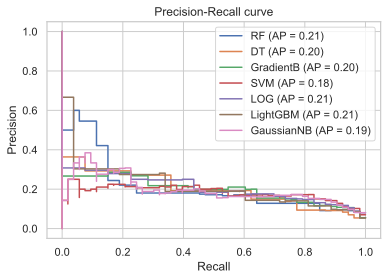

In [73]:
# Plot Models
# precision = precision_score(y_test, pred)
# recall = recall_score(y_test, pred)

# plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

'''

estimators = [('GradientBoosting', GB_model),
              ('Random Forest', RF_model),
              ('Decision Tree', DT_model),
              ('SVM', SVM_model),
              ('LGBM', LGBM_model),
              ('GaussianNB', GNB_model),
              ('LogisticRegression', LOG_model)]
'''
GB_model.fit(X_res,y_res)
RF_model.fit(X_res,y_res)
DT_model.fit(X_res,y_res)
SVM_model.fit(X_res,y_res)
LGBM_model.fit(X_res,y_res)
GNB_model.fit(X_res,y_res)
LOG_model.fit(X_res,y_res)

plot_precision_recall_curve(RF_model, X_test, y_test, ax = plt.gca(),name = "RF")
plot_precision_recall_curve(DT_model, X_test, y_test, ax = plt.gca(),name = "DT")
plot_precision_recall_curve(GB_model, X_test, y_test, ax = plt.gca(),name = "GradientB")
plot_precision_recall_curve(SVM_model, X_test, y_test, ax = plt.gca(),name = "SVM")
plot_precision_recall_curve(LOG_model, X_test, y_test, ax = plt.gca(),name = "LOG")
plot_precision_recall_curve(LGBM_model, X_test, y_test, ax = plt.gca(),name = "LightGBM")
plot_precision_recall_curve(GNB_model, X_test, y_test, ax = plt.gca(),name = "GaussianNB")
plot_precision_recall_curve(GNB_model, X_test, y_test, ax = plt.acorr(),name = "GaussianNB")

# plot title
plt.title('Precision-Recall curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

#### The final model

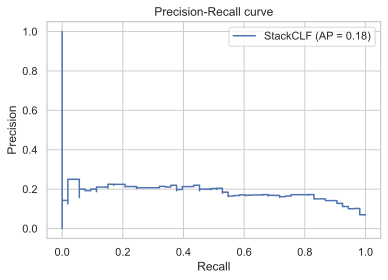

In [74]:
plot_precision_recall_curve(stacking_clf, X_test, y_test, ax = plt.gca(),name = "StackCLF")

# plot title
plt.title('Precision-Recall curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()